In [23]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from sklearn.svm import SVC

In [14]:
data=pd.read_csv('C:\\Users\\abc\\Desktop\\Dataset\\Cellphone.csv')

In [15]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [16]:
X=data.copy()

In [17]:
y=X.pop('price_range')

In [7]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=100)

In [8]:
svm=SVC()
svm.fit(x_train,y_train)
unscaled_test_score=svm.score(x_test,y_test)
unscaled_test_score

0.24333333333333335

# Min Max Scalaer

### Only in scaling we will use fit_transform for x train. but in any alogorithm we use fit_transform for x train and x test 

In [18]:
X=(X-np.min(X))/(np.max(X)-np.min(X))

In [19]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=100)
svm=SVC()
svm.fit(x_train,y_train)
scaled_test_score=svm.score(x_test,y_test)
scaled_test_score

0.8733333333333333

# SelectKBest  will select the best feature with respet to thed target

In [20]:
from sklearn.feature_selection import SelectKBest,f_classif

In [21]:
feature_list_accuracy=[]
k=np.arange(1,21)
for i in k:
    select=SelectKBest(f_classif,k=i)
    x_train_new=select.fit_transform(x_train,y_train)
    svm.fit(x_train_new,y_train)
    feature_list_accuracy.append(svm.score(x_train_new,y_train))

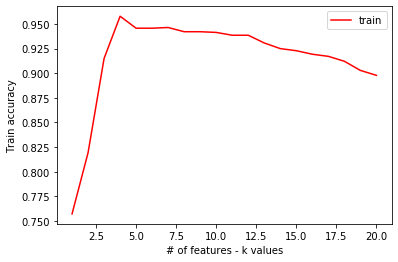

In [24]:
plt.plot(k,feature_list_accuracy,color='red',label='train')
plt.xlabel('# of features - k values')
plt.ylabel('Train accuracy')
plt.legend()
plt.show()
#k=5 gives maximum accuracy of featues i.e 95% accuracy

In [25]:
select=SelectKBest(f_classif,k=5)   # for SelectKBest, we hve to do fit_transform for both x train and x test. Ww have defined k=5, since the maximum accuracy is reached when top 5 features are selected
x_train_new=select.fit_transform(x_train,y_train)
x_test_new=select.fit_transform(x_test,y_test)
print('Train Top Features:',x_train.columns.values[select.get_support()])   #select.get_support()- will search for the top 5 featues and returns in print
print('Test Top Features:',x_test.columns.values[select.get_support()])

Train Top Features: ['battery_power' 'dual_sim' 'px_height' 'px_width' 'ram']
Test Top Features: ['battery_power' 'dual_sim' 'px_height' 'px_width' 'ram']


In [31]:
c_values=[0.25,0.50,0.75,1]
kernel_types=['linear','rbf']
gamma_values=['auto',0.01,0.1,1]

# GridSearchCV- intead of manually defining C,kernel, gamma and computing, we use GridSearchCV

In [32]:
from sklearn.model_selection import GridSearchCV

In [36]:
svm=SVC()
grid_svm=GridSearchCV(estimator=svm,param_grid=dict(kernel=kernel_types,C=c_values,gamma=gamma_values))  # estimatoe, we can give any alogorithm
grid_svm.fit(x_train_new,y_train)
best_parameters=grid_svm.best_estimator_
best_parameters

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [37]:
svm=SVC(kernel='linear',C=1,gamma='auto')
svm.fit(x_train_new,y_train)
print('Train Score:',svm.score(x_train_new,y_train))
print('Test Score:',svm.score(x_test_new,y_test))

Train Score: 0.9542857142857143
Test Score: 0.9483333333333334


#### Confusion Matrix- Used to find the accuracy

In [38]:
from sklearn.metrics import confusion_matrix

In [39]:
y_test_pred=svm.predict(x_test_new)
cm=confusion_matrix(y_test,y_test_pred)
cm

array([[155,   4,   0,   0],
       [  2, 140,   4,   0],
       [  0,  11, 130,   6],
       [  0,   0,   4, 144]], dtype=int64)

In [41]:
# Accuracy Score of y_test and y_test_pred and svm.score for x_test_new and y_test are same

In [42]:
print('Accuracy score of test:',accuracy_score(y_test,y_test_pred))

Accuracy score of test: 0.9483333333333334
